In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
filename ='/content/drive/My Drive/operaciones_basicas/sales_predictions_2023.csv'
df = pd.read_csv(filename)
df_shape=df.shape

print("Filas " + str(df_shape[0]))

print("Columnas " + str(df_shape[1]))

Filas 8523
Columnas 12


In [5]:
#1 ¿Cuántas filas y columnas?
#Respuesta 1 : Hay 8523 filas y 12 columnas

In [6]:
#2 ¿Cuáles son los tipos de datos en cada variable?
tipos_datos=df.dtypes
print(tipos_datos)


Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


In [7]:
#3  ¿Hay duplicados? Si es el caso, eliminen algunos duplicados.
duplicados_df=df.duplicated()
cantidad_duplicados= duplicados_df.sum
print(cantidad_duplicados)

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool>


In [8]:
# 4 Identifiquen los valores faltantes.
from pandas.io.pytables import dropna_doc
df_filtered=df[df["Outlet_Identifier"]=="OUT045"]
df_filtered["Outlet_Size"].value_counts(dropna = False)
df_filtered["Outlet_Size"]


8       NaN
33      NaN
46      NaN
47      NaN
56      NaN
       ... 
8483    NaN
8502    NaN
8508    NaN
8514    NaN
8519    NaN
Name: Outlet_Size, Length: 929, dtype: object

In [9]:
# 5 Decidan cómo abordar los valores faltantes y cómo hacerlo. (Esto requiere sus criterios, así que expliquen su elección).
#Criterios y spuestos:
# - Al investigar en los datos se encontró un patrón en los datos NaN que faltaba en la columna Item_Weight, ya que coinciden con los mismo valores de las etiquestas de la columna Item_identifier y por lo tanto se tomó como supuesto que los valores coiciden, por lo tanto con los codigos de más abajo se utilizará la mediana para reemplazar los valores en Item_Weight.
# - Se Encontraron dos clásificación extra en  Item_Fat_Content que son LF y rg, se asumirá que corresponden a un error de clásificación para low fat y regular, así que se procedará a reemplazar esos valores.
# - Se Encontraron datos faltantes en la columna Outlet_Size, se investigarón y se descubrió que tienen
# Calcular la mediana de "Item_Weight" por cada "Item_Identifier"


median_values = df.groupby('Item_Identifier')['Item_Weight'].median()

# Filtrar las filas donde "Item_Weight" es NaN
filtro = df['Item_Weight'].isna()

# Actualizar los valores NaN en "Item_Weight" con la mediana correspondiente a cada "Item_Identifier"
df.loc[filtro, 'Item_Weight'] = df.loc[filtro, 'Item_Identifier'].map(median_values)

nan_indices = df['Item_Weight'].isnull().sum()
print("Número de valores NaN en 'Item_Weight':", nan_indices)

nan_items = df.loc[df['Item_Weight'].isnull(), 'Item_Identifier']
print("Item_Identifier con valores NaN en 'Item_Weight':")
print(nan_items)




Número de valores NaN en 'Item_Weight': 4
Item_Identifier con valores NaN en 'Item_Weight':
927     FDN52
1922    FDK57
4187    FDE52
5022    FDQ60
Name: Item_Identifier, dtype: object


In [10]:
df[df['Item_Identifier']=='FDN52']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564


In [11]:
#Con este codigo se eliminaran las filas que tienen estos valores NaN que no se pudieron reemplazar
df = df.drop([927, 1922, 4187, 5022])

In [12]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', "Low Fat")
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace("low fat", "Low Fat")
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace("reg", "Regular")


In [13]:
categorias = df['Item_Fat_Content'].unique()
print(categorias)


['Low Fat' 'Regular']


In [14]:
#Con este codigo se procedió a reemplazar los valores NaN por Small en la columna Outlet_Size.
df['Outlet_Size'] = df['Outlet_Size'].fillna('Small')
print("Fin del ejercicio 5")

Fin del ejercicio 5


In [15]:
#6 Confirmen que no hay valores faltantes después de abordarlos.
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [16]:
#7 Encuentren y arreglen alguna categoría inconsistente de datos (example: fix cat, Cat, and cats so that they are consistent)

# Approach 1 dictionary substitution using rename method
df = df.rename(columns={'Item_MRP': 'Item_maximum_price'})
df.head(30)




,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_maximum_price,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350


In [17]:
#8 Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)
df.describe().round(2)


,Item_Weight,Item_Visibility,Item_maximum_price,Outlet_Establishment_Year,Item_Outlet_Sales
count,8519.00,8519.00,8519.00,8519.00,8519.00
mean,12.88,0.07,141.01,1997.84,2181.19
std,4.65,0.05,62.28,8.37,1706.51
min,4.56,0.00,31.29,1985.00,33.29
25%,8.78,0.03,93.84,1987.00,834.25
50%,12.65,0.05,143.05,1999.00,1794.33
75%,16.85,0.09,185.68,2004.00,3100.63
max,21.35,0.33,266.89,2009.00,13086.96


<Axes: xlabel='Venta de articulos', ylabel='Conteo'>

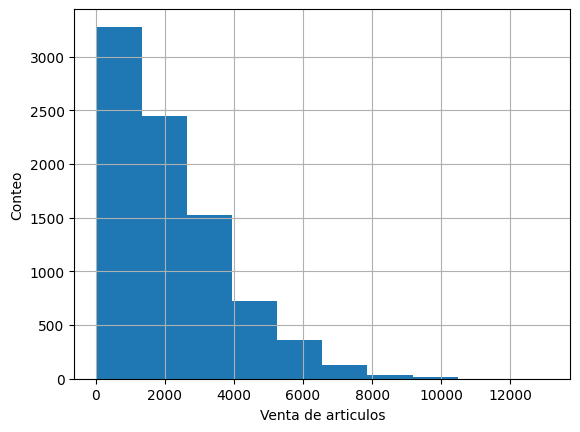

In [18]:
plt.xlabel('Venta de articulos')
plt.ylabel('Conteo')
df['Item_Outlet_Sales'].hist()

<Axes: >

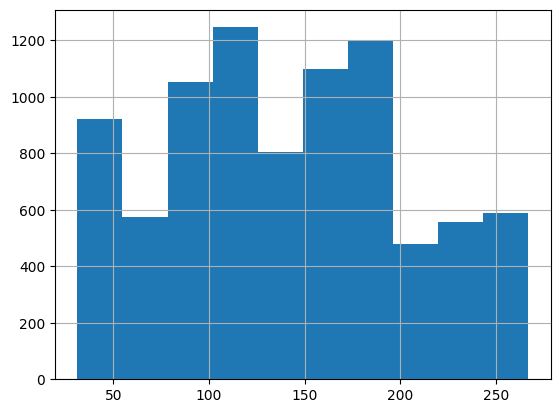

In [19]:
df['Item_maximum_price'].hist()

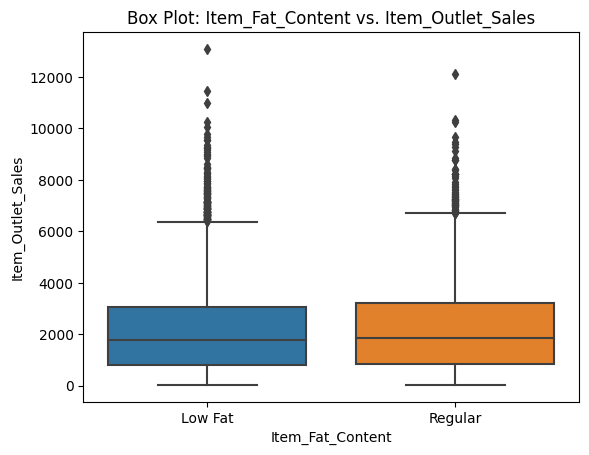

In [20]:
# Crear el box plot
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df)

# Agregar etiquetas y título
plt.xlabel('Item_Fat_Content')
plt.ylabel('Item_Outlet_Sales')
plt.title('Box Plot: Item_Fat_Content vs. Item_Outlet_Sales')

# Mostrar el gráfico
plt.show()


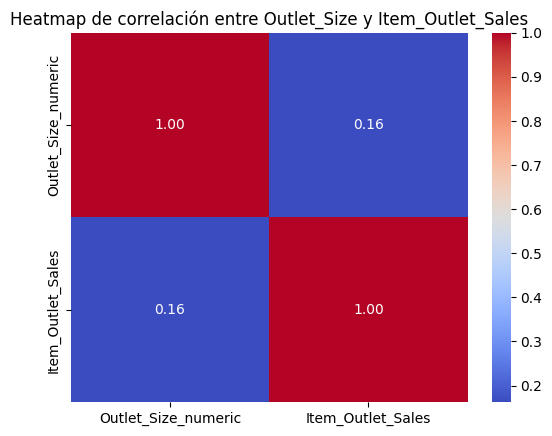

In [23]:
# Supongamos que df es tu DataFrame
# Primero, vamos a convertir la columna "Outlet_Size" a una representación numérica

# Crea un mapeo para asignar un valor numérico a cada categoría de Outlet_Size
size_mapping = {
    'Small': 1,
    'Medium': 2,
    'High': 3
}

# Usa la función map() para convertir la columna "Outlet_Size" a valores numéricos
df['Outlet_Size_numeric'] = df['Outlet_Size'].map(size_mapping)

# Ahora podemos crear la matriz de correlación y el gráfico de correlación de calor
selected_columns = df[['Outlet_Size_numeric', 'Item_Outlet_Sales']]
correlation_matrix = selected_columns.corr()

# Genera el gráfico de correlación de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap de correlación entre Outlet_Size y Item_Outlet_Sales')
plt.show()


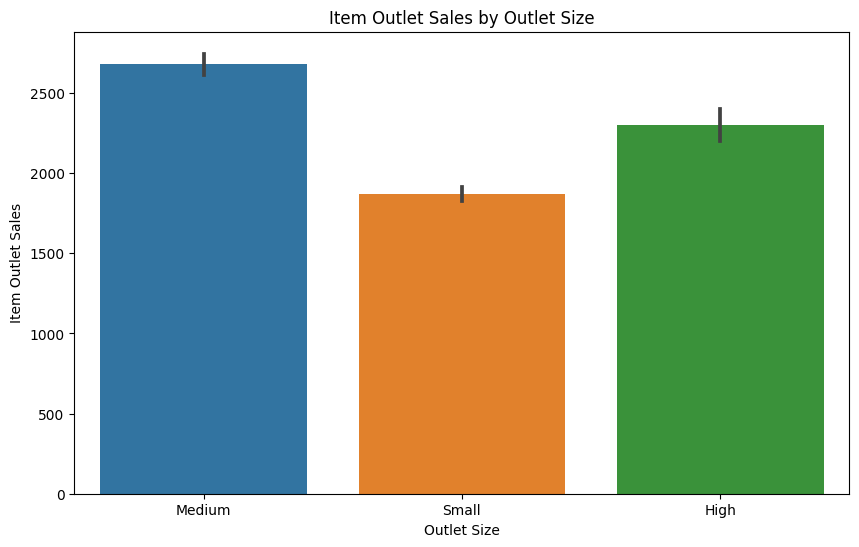

In [27]:
# Supongamos que df es tu DataFrame

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df)
plt.xlabel('Outlet Size')
plt.ylabel('Item Outlet Sales')
plt.title('Item Outlet Sales by Outlet Size')
plt.show()
